In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pypalettes import load_cmap

In [8]:
df = pd.read_csv('../Data/all_definitions.csv')

df.columns

Index(['ResponseId', 'ParticipantDefine', 'ChosenDefinition',
       'GeneratedDefinition'],
      dtype='object')

In [9]:
own = df['ParticipantDefine']
generated = df['GeneratedDefinition']
chosen = df['ChosenDefinition']

paired_sentences = []

for o, c, g in zip(own, chosen, generated):
    paired_sentences.append((o, c, g))

#empty values for participant who did not answer
paired_sentences[6] = ('', '', '')
paired_sentences[7] = ('', '', '')

#compute lengths of words in each paired sentence
paired_len = []
for ps in paired_sentences:
    a = ps[0].split()
    b = ps[1].split()
    c = ps[2].split()
    if a and b and c:
        paired_len.append((len(a), len(b), len(c)))

print(paired_len)


[(21, 91, 105), (15, 159, 80), (19, 83, 83), (21, 73, 116), (14, 78, 105), (58, 172, 225), (41, 50, 63), (95, 64, 77), (26, 225, 225)]


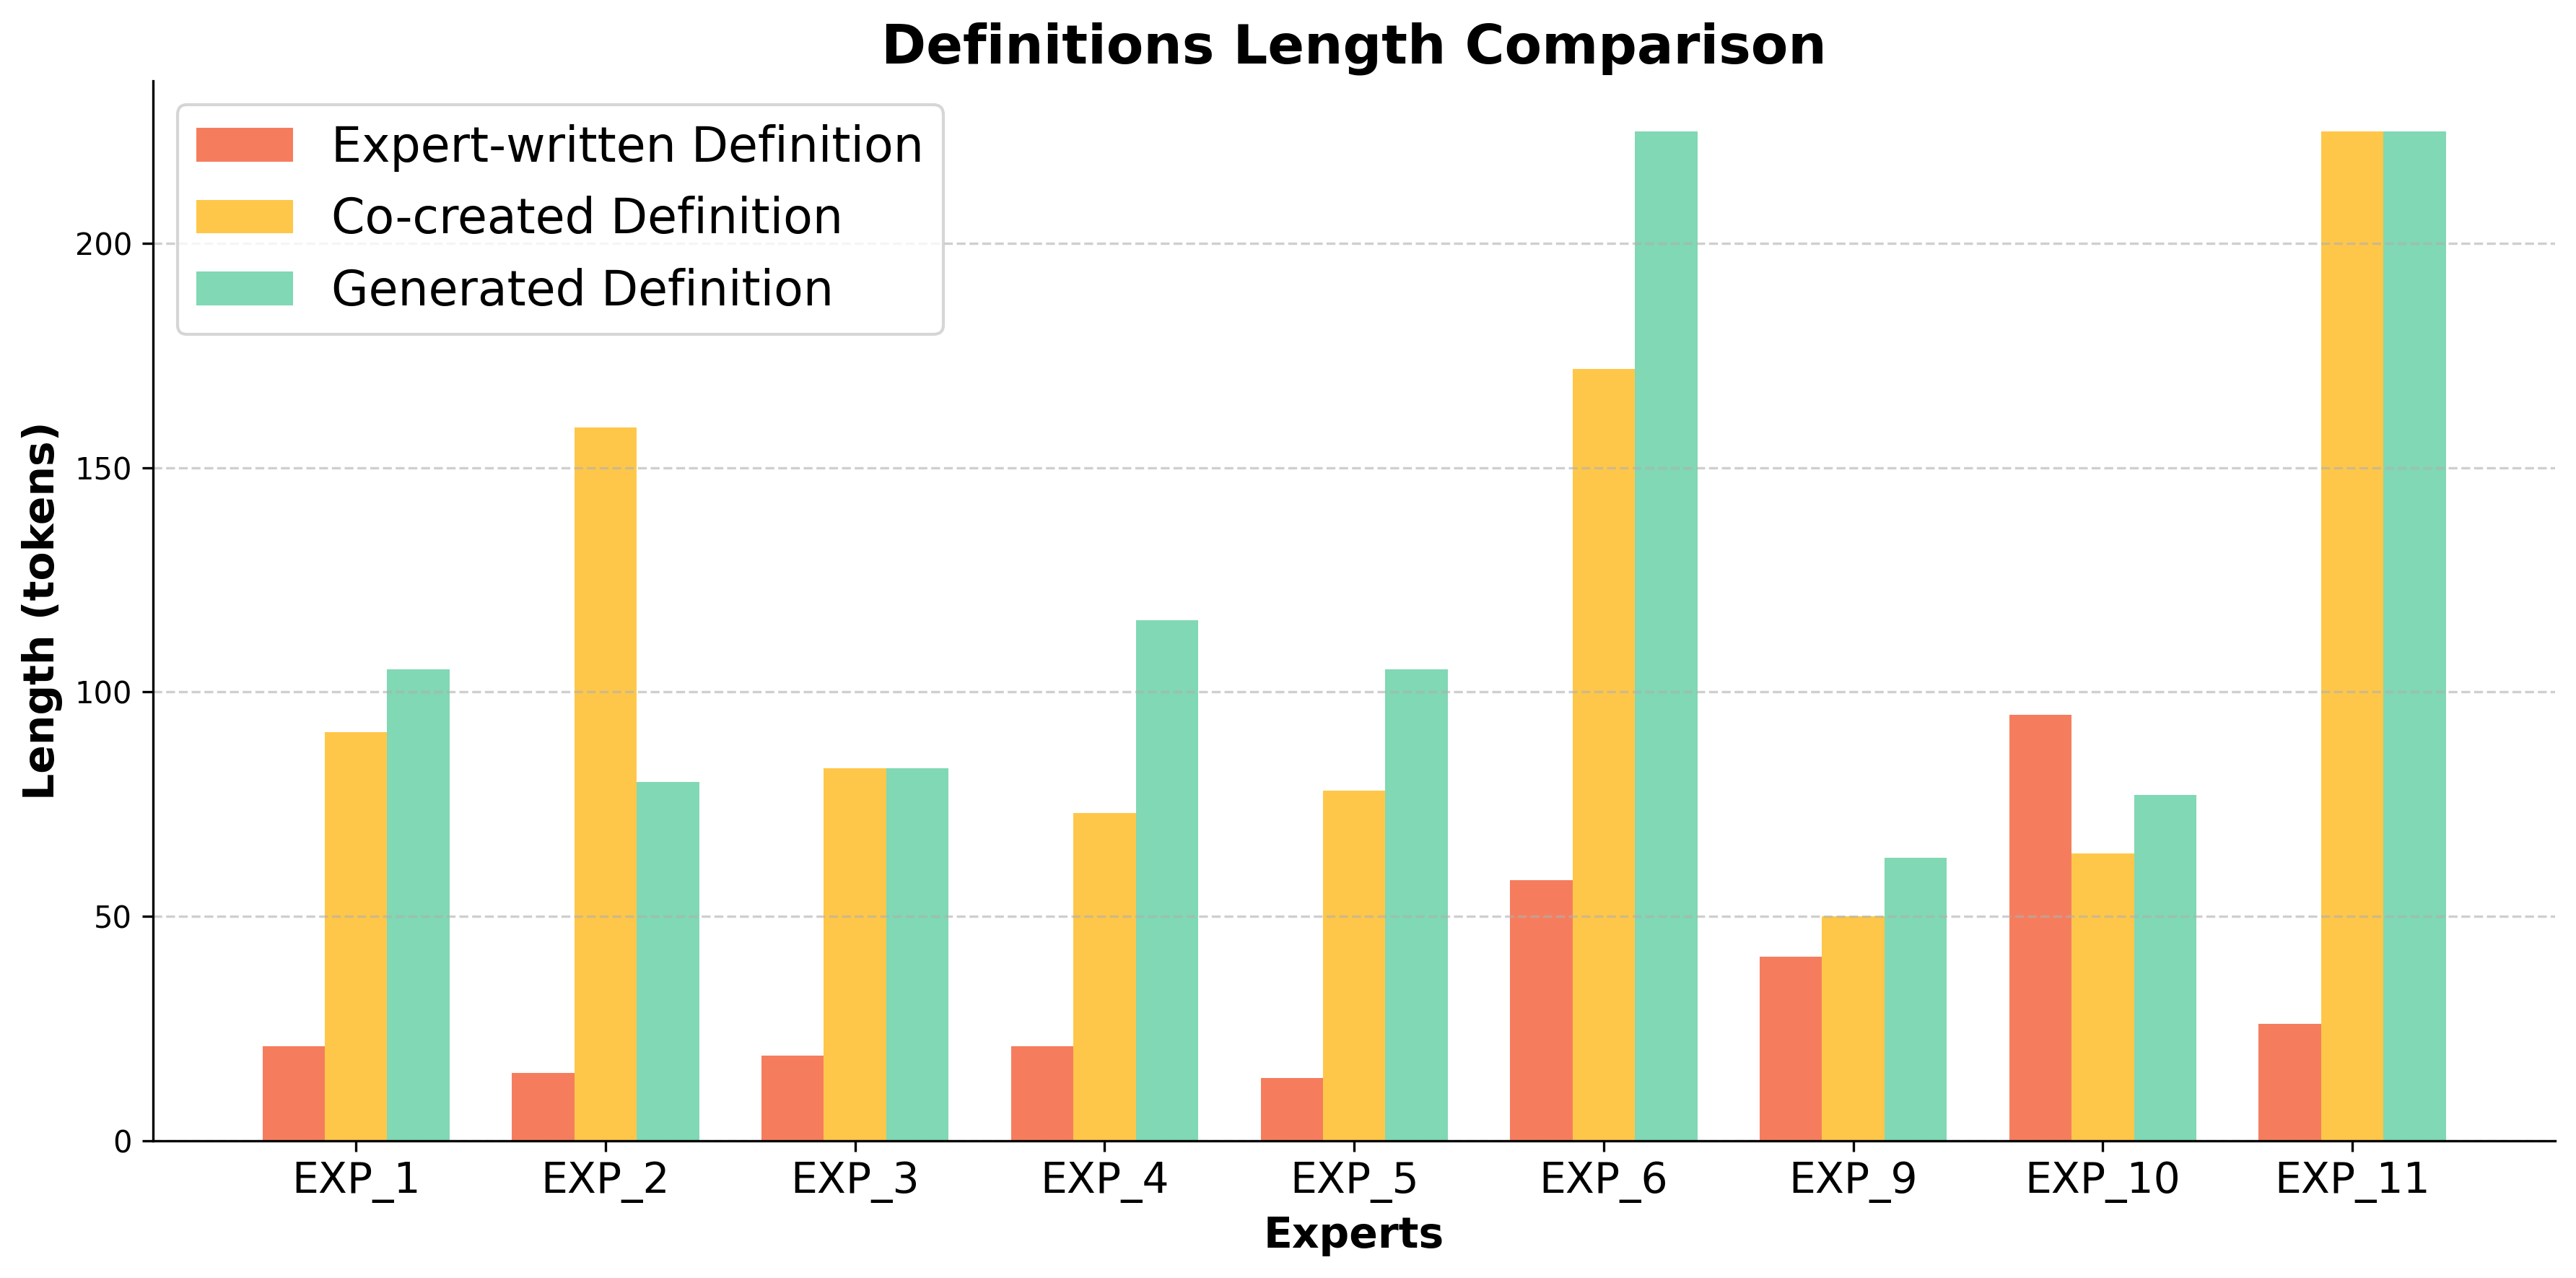

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pypalettes import load_cmap

custom_cmap = load_cmap("Connors")

color1 = custom_cmap(1)    #(Red)
color2 = custom_cmap(5)    #(Yellow)
color3 = custom_cmap(3)    #(Green)

sentence1_lengths = [x[0] for x in paired_len]  
sentence2_lengths = [x[1] for x in paired_len]  
sentence3_lengths = [x[2] for x in paired_len]  

indices = np.arange(len(paired_len))

width = 0.25

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

bar1 = ax.bar(indices - width, sentence1_lengths, width, label='Expert Definition', color=color1, alpha=0.8)  # Red
bar2 = ax.bar(indices, sentence2_lengths, width, label='Generated Definition', color=color3, alpha=0.8)  # Green
bar3 = ax.bar(indices + width, sentence3_lengths, width, label='Hybrid Definition', color=color2, alpha=0.8)  # Yellow

ax.set_xlabel('Experts', fontsize=14, fontweight='bold')
ax.set_ylabel('Length (tokens)', fontsize=14, fontweight='bold')
ax.set_title('Definitions Length Comparison', fontsize=18, fontweight='bold')

expert_labels = ['EXP_1', 'EXP_2', 'EXP_3', 'EXP_4', 'EXP_5', 'EXP_6', 'EXP_9', 'EXP_10', 'EXP_11']

ax.set_xticks(indices)  
ax.set_xticklabels(expert_labels, fontsize=14, rotation=0)

ax.grid(True, axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(labels=['Expert-written Definition', 'Co-created Definition', 'Generated Definition'], fontsize=16)

# Adjust layout to avoid cutoff
plt.tight_layout()

# Save the plot
plt.savefig('/Users/matteo/Desktop/GESIS/MIM/imgs_new/length_tot.pdf', bbox_inches='tight')

# Display the plot
plt.show()
